In [1]:
from datasets import load_dataset

dataset = load_dataset("ag_news")

/home/students/s289159/.conda/envs/audio-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using custom data configuration default
Reusing dataset ag_news (/home/students/s289159/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)
100%|██████████| 2/2 [00:00<00:00, 330.89it/s]


In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

In [3]:
id2label = {'0': "World",
            '1': "Sports",
            '2': "Business",
            '3': "Sci/Tech"}

In [4]:
# Convert the dataset to a pandas DataFrame
df_train = dataset['train'].to_pandas()

df_test = dataset['test'].to_pandas()

In [5]:
df_train.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [6]:
df_train_full = df_train.sample(frac=1).reset_index(drop=True)

In [7]:
percentage = 0.66
index_split = int(len(df_train_full)*percentage)

df_train = df_train_full[:index_split]
df_deg = df_train_full[index_split:]

<AxesSubplot:title={'center':'Target Dristribution'}, ylabel='Frequency'>

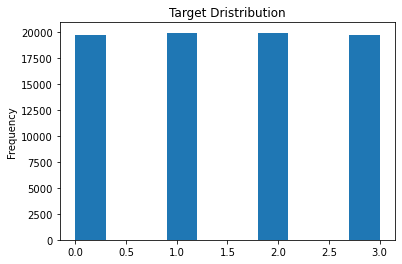

In [8]:
df_train.label.plot(kind='hist', title='Target Dristribution')

<AxesSubplot:title={'center':'Target Dristribution'}, ylabel='Frequency'>

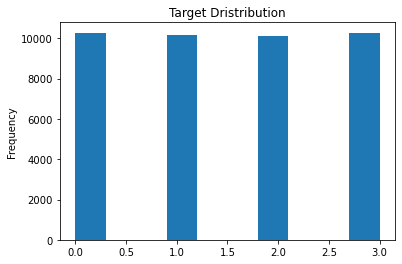

In [9]:
df_deg.label.plot(kind='hist', title='Target Dristribution')

In [10]:
df_train['id'] = range(0, len(df_train))
df_deg['id'] = range(len(df_train),len(df_train)+len(df_deg) )
df_test['id'] = range(len(df_deg)+len(df_train),len(df_train)+len(df_deg)+len(df_test))

/tmp/ipykernel_836512/3196163558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['id'] = range(0, len(df_train))
/tmp/ipykernel_836512/3196163558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deg['id'] = range(len(df_train),len(df_train)+len(df_deg) )


In [11]:
df_train.head()

,text,label,id
0,"Colts, Vanderjagt save best for last Peyton Ma...",1,0
1,Saturn's Moon Titan: Planet Wannabe by Henry B...,3,1
2,Farooqi key link between Pakistan and al Qaeda...,0,2
3,California Calls the Shots California is enact...,2,3
4,"iPod to go 80GB? Toshiba, whose tiny hard driv...",3,4


In [12]:
import re

def clean_text(text):
    text = re.sub("@\S+", " ", text) # Remove Mentions
    text = re.sub("https*\S+", " ", text) # Remove URL
    text = re.sub("#\S+", " ", text) # Remove Hastags
    text = re.sub('&lt;/?[a-z]+&gt;', '', text) # Remove special Charaters
    text = re.sub('#39', ' ', text) # Remove special Charaters
    text = re.sub('<.*?>', '', text) # Remove html
    text = re.sub(' +', ' ', text) # Merge multiple blank spaces
    return text

def get_label_name(label_id):
    labels = ["World", "Sports", "Business", "Sci/Tech"]
    return labels[label_id]

In [13]:
df_train_cleaned = df_train.copy()
df_deg_cleaned = df_deg.copy()
df_test_cleaned = df_test.copy()

df_train_cleaned["text"] = df_train_cleaned["text"].apply(clean_text)
df_deg_cleaned["text"] = df_deg_cleaned["text"].apply(clean_text)
df_test_cleaned["text" ]= df_test_cleaned["text"].apply(clean_text)

In [14]:
import numpy as np

df_train_cleaned['text'].replace('', np.nan, inplace=True)
df_deg_cleaned['text'].replace('', np.nan, inplace=True)
df_test_cleaned['text'].replace('', np.nan, inplace=True)

df_train_cleaned.dropna(subset=['text'], inplace=True)
df_deg_cleaned.dropna(subset=['text'], inplace=True)
df_test_cleaned.dropna(subset=['text'], inplace=True)

df_train_cleaned = df_train_cleaned.drop(df_train_cleaned[df_train_cleaned.text.str.isspace()].index)
df_deg_cleaned = df_deg_cleaned.drop(df_deg_cleaned[df_deg_cleaned.text.str.isspace()].index)
df_test_cleaned = df_test_cleaned.drop(df_test_cleaned[df_test_cleaned.text.str.isspace()].index)

df_train_cleaned = df_train_cleaned.drop(df_train_cleaned[df_train_cleaned.text == ""].index)
df_deg_cleaned = df_deg_cleaned.drop(df_deg_cleaned[df_deg_cleaned.text == ""].index)
df_test_cleaned = df_test_cleaned.drop(df_test_cleaned[df_test_cleaned.text == ""].index)

In [15]:
label_list = [0, 1, 2, 3]
training_label_list = [0, 1, 2]
drift_label_list = [3]

In [16]:
df_train_filtered = df_train_cleaned.loc[df_train_cleaned['label'].isin(training_label_list)]
df_train_drifted = df_train_cleaned.loc[df_train_cleaned['label'].isin(drift_label_list)]

df_test_filtered = df_test_cleaned.loc[df_test_cleaned['label'].isin(training_label_list)]
df_test_drifted = df_test_cleaned.loc[df_test_cleaned['label'].isin(drift_label_list)]

df_deg_filtered = df_deg_cleaned.loc[df_deg_cleaned['label'].isin(training_label_list)]
df_deg_drifted = df_deg_cleaned.loc[df_deg_cleaned['label'].isin(drift_label_list)]

<AxesSubplot:>

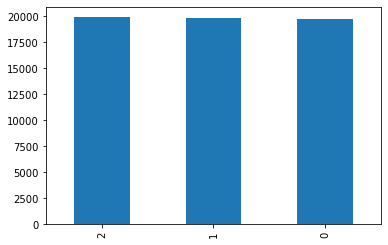

In [17]:
df_train_filtered['label'].value_counts(sort=True).plot.bar()

In [18]:
df_train_filtered.shape

(59480, 3)

<AxesSubplot:>

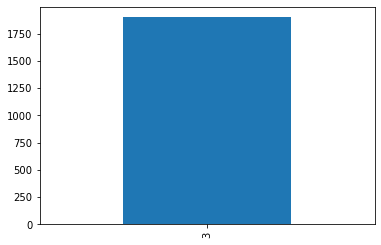

In [19]:
df_test_drifted['label'].value_counts(sort=True).plot.bar()

<AxesSubplot:>

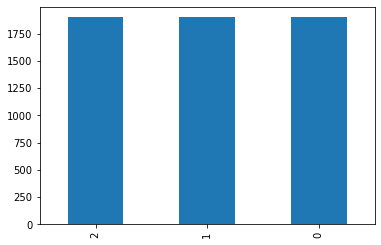

In [20]:
df_test_filtered['label'].value_counts(sort=True).plot.bar()

In [21]:
import pandas as pd
df_drifted = pd.concat([df_train_drifted, df_test_drifted, df_deg_drifted])
df_new_unseen = df_deg_filtered.copy()

<AxesSubplot:>

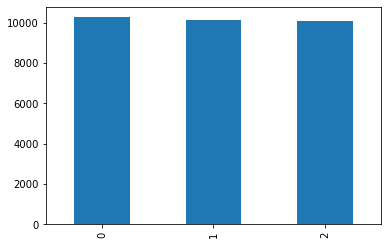

In [22]:
df_new_unseen['label'].value_counts(sort=True).plot.bar()

In [23]:
df_new_unseen.shape

(30520, 3)

<AxesSubplot:>

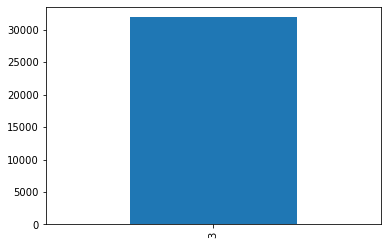

In [24]:
df_drifted['label'].value_counts(sort=True).plot.bar()

In [25]:
df_drifted.shape

(31900, 3)

In [26]:
import os

data_dir = "static/data/bert"

df_train_filtered.to_csv(os.path.join(data_dir,"df_train_0_1_2.csv"))
df_test_filtered.to_csv(os.path.join(data_dir,"df_test_0_1_2.csv"))
df_new_unseen.to_csv(os.path.join(data_dir,"df_new_unseen_0_1_2.csv"))
df_drifted.to_csv(os.path.join(data_dir,"df_drifted_3.csv"))

In [27]:
print(df_train_filtered.shape)
print(df_test_filtered.shape)
print(df_new_unseen.shape)


(59480, 3)
(5700, 3)
(30520, 3)


In [1]:
model_name = "bert-base-uncased"

In [29]:
import datasets
from datasets import Dataset, DatasetDict


train_dataset = Dataset.from_pandas(df_train_filtered)
validation_dataset = Dataset.from_pandas(df_test_filtered)


ds = DatasetDict()

ds['train'] = train_dataset.shuffle()
ds['validation'] = validation_dataset.shuffle()

In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=True)


/home/students/s289159/.conda/envs/airbnb-XAI-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = ds.map(tokenize_function, batched=True)

100%|██████████| 6/6 [00:01<00:00,  5.59ba/s]


In [32]:
label2id_train = {"World": 0,
                  "Sports": 1,
                  "Business": 2}

In [33]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, 
                                                           num_labels=len(training_label_list),
                                                           label2id=label2id_train,
                                                           id2label={id: label for label, id in label2id_train.items()})

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [34]:
import sklearn

def compute_metrics(pred):
    labels = pred.label_ids
    print(pred)
    try:
        preds = pred.predictions.argmax(-1)
    except:
        preds = pred.predictions[0].argmax(-1)
    precision, recall, f1, _ = sklearn.metrics.precision_recall_fscore_support(
        labels, preds, average="macro", labels=list(set(labels))
    )
    print(sklearn.metrics.classification_report(labels, preds, digits=4))
    acc = sklearn.metrics.accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

In [35]:
from transformers import TrainingArguments

model_dir = "static/saved_models/bert"

training_args = TrainingArguments(
    output_dir=os.path.join(model_dir, "checkpoint"),
    learning_rate=2e-5,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    metric_for_best_model="f1",
    load_best_model_at_end=True,
    greater_is_better=True,
)

In [36]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'id', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 59480
    })
    validation: Dataset({
        features: ['text', 'label', 'id', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 5700
    })
})

In [37]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [38]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, __index_level_0__, text. If id, __index_level_0__, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/home/students/s289159/.conda/envs/audio-env/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 59480
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 11154


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.105100,0.106293,0.973684,0.973677,0.973710,0.973684
2,0.069500,0.102683,0.975439,0.975456,0.975486,0.975439
3,0.040600,0.123629,0.975439,0.975437,0.975435,0.975439


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, __index_level_0__, text. If id, __index_level_0__, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5700
  Batch size = 16


              precision    recall  f1-score   support

           0     0.9614    0.9711    0.9662      1900
           1     0.9874    0.9895    0.9884      1900
           2     0.9723    0.9605    0.9664      1900

    accuracy                         0.9737      5700
   macro avg     0.9737    0.9737    0.9737      5700
weighted avg     0.9737    0.9737    0.9737      5700



Saving model checkpoint to use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-3718
Configuration saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-3718/config.json
Model weights saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-3718/pytorch_model.bin
tokenizer config file saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-3718/tokenizer_config.json
Special tokens file saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-3718/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, __index_level_0__, text. If id, __index_level_0__, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5700
  Batch size = 16


              precision    recall  f1-score   support

           0     0.9679    0.9668    0.9674      1900
           1     0.9915    0.9858    0.9887      1900
           2     0.9671    0.9737    0.9704      1900

    accuracy                         0.9754      5700
   macro avg     0.9755    0.9754    0.9755      5700
weighted avg     0.9755    0.9754    0.9755      5700



Saving model checkpoint to use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-7436
Configuration saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-7436/config.json
Model weights saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-7436/pytorch_model.bin
tokenizer config file saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-7436/tokenizer_config.json
Special tokens file saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-7436/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, __index_level_0__, text. If id, __index_level_0__, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5700
  Batch size = 16


              precision    recall  f1-score   support

           0     0.9679    0.9679    0.9679      1900
           1     0.9884    0.9889    0.9887      1900
           2     0.9700    0.9695    0.9697      1900

    accuracy                         0.9754      5700
   macro avg     0.9754    0.9754    0.9754      5700
weighted avg     0.9754    0.9754    0.9754      5700



Saving model checkpoint to use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-11154
Configuration saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-11154/config.json
Model weights saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-11154/pytorch_model.bin
tokenizer config file saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-11154/tokenizer_config.json
Special tokens file saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-11154/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from use_case/hf-bert-ag_news-0-1-2-split66/saved_model/checkpoint/checkpoint-7436 (score: 0.9754557130153986).


TrainOutput(global_step=11154, training_loss=0.07929810567934154, metrics={'train_runtime': 5890.0986, 'train_samples_per_second': 30.295, 'train_steps_per_second': 1.894, 'total_flos': 4.694995825938432e+16, 'train_loss': 0.07929810567934154, 'epoch': 3.0})

In [39]:
trainer.save_model(os.path.join(model_dir, "best_model"))

Saving model checkpoint to use_case/hf-bert-ag_news-0-1-2-split66/saved_model/best_model
Configuration saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/best_model/config.json
Model weights saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/best_model/pytorch_model.bin
tokenizer config file saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/best_model/tokenizer_config.json
Special tokens file saved in use_case/hf-bert-ag_news-0-1-2-split66/saved_model/best_model/special_tokens_map.json


In [40]:
print(
    "\n ----------------- EVALUATION BEST MODEL ON VALIDATION SET ----------------- \n"
)
print(trainer.evaluate())

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, __index_level_0__, text. If id, __index_level_0__, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5700
  Batch size = 16



 ----------------- EVALUATION BEST MODEL ON VALIDATION SET ----------------- 



              precision    recall  f1-score   support

           0     0.9679    0.9668    0.9674      1900
           1     0.9915    0.9858    0.9887      1900
           2     0.9671    0.9737    0.9704      1900

    accuracy                         0.9754      5700
   macro avg     0.9755    0.9754    0.9755      5700
weighted avg     0.9755    0.9754    0.9755      5700

{'eval_loss': 0.10268290340900421, 'eval_accuracy': 0.9754385964912281, 'eval_f1': 0.9754557130153986, 'eval_precision': 0.9754860831910408, 'eval_recall': 0.9754385964912281, 'eval_runtime': 62.007, 'eval_samples_per_second': 91.925, 'eval_steps_per_second': 5.757, 'epoch': 3.0}
